# Task: Predicting Real Estate House Prices

### Dataset: Real_estate.csv

### Import the necessary libraries
#### Hint: Also import seaborn

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Read the csv data into a pandas dataframe and display the first 5 samples

In [2]:
df = pd.read_csv("Real estate.csv")
df.head(5)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


### Show more information about the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


### Find how many samples are there and how many columns are there in the dataset

In [4]:
df.shape

(414, 8)

### What are the features available in the dataset?

In [5]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

### Check if any features have missing data

In [6]:
df.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

### Group all the features as dependent features in X

In [7]:
x = df.iloc[:, :-1]
x

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067


### Group feature(s) as independent features in y

In [8]:
y =df.iloc[:,-1]
y

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: Y house price of unit area, Length: 414, dtype: float64

### Split the dataset into train and test data

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2,random_state = 42)

### Choose the model (Linear Regression)

In [11]:
from sklearn.linear_model import LinearRegression

### Create an Estimator object

In [12]:
linear_estimator = LinearRegression()

### Train the model

In [13]:
linear_estimator.fit(x_train,y_train)

LinearRegression()

### Apply the model

In [14]:
predict_y = linear_estimator.predict(x_test)
predict_y

array([47.04645871, 40.40783016, 43.37463978, 39.20600382, 26.62817953,
       45.8923956 , 44.33888897, 46.74448468, 24.43235155, 55.06258487,
       34.60848974, 36.92386329, 36.76420984, 24.30494918, 35.79519845,
       33.44810036, 44.24993318, 44.98654734, 29.18096544, 44.80711275,
        1.15259949, 36.10694406, 47.26486776, 45.90792727, 10.96198835,
       38.69069634, 12.57701679, 43.61237869, 35.7142565 , 37.55475044,
       14.14012034, 40.46209983, 35.90891223, 28.5174525 , 47.38286733,
       30.9022379 , 50.43545093, 12.92669013, 48.95222574, 39.27068588,
       39.3872837 , 40.09381011, 48.20107097, 37.08010208, 39.54765933,
       47.348201  , 43.3815801 , 21.07747224, 47.05299802, 44.57951775,
       48.24233055, 48.12297596, 41.42189435, 42.25141469, 36.32214409,
       15.69024514, 37.64733588, 35.12221291, 29.08561558, 46.86297981,
       32.07763941, 33.25961566, 15.22965501,  9.01697131,  9.37929873,
       33.78712833, 29.59931587, 47.50139803, 33.81312917, 31.84

### Display the coefficients

In [15]:
coefficients = linear_estimator.coef_
coefficients

array([-5.61695287e-03,  5.40743502e+00, -2.67827999e-01, -4.81543315e-03,
        1.08114445e+00,  2.26048799e+02, -3.01254914e+01])

### Find how well the trained model did with testing data

In [16]:
from sklearn.metrics import r2_score

In [18]:
r2 = r2_score(y_test,predict_y)
print("r2:",r2)

r2: 0.6745228670350871


### Plot House Age Vs Price
#### Hint: Use regplot in sns

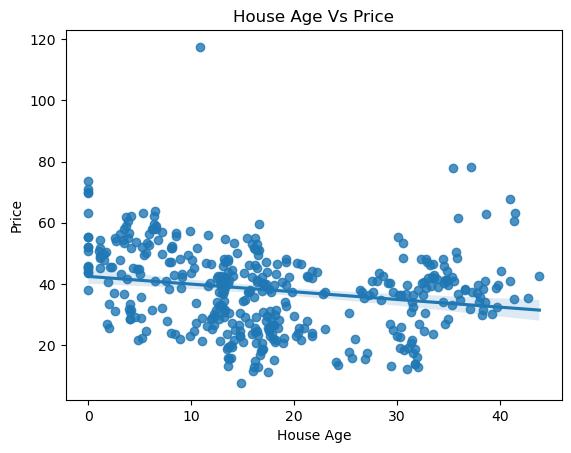

In [19]:
sns.regplot(x =  "X2 house age", y = "Y house price of unit area",data = df)
plt.xlabel("House Age")
plt.ylabel("Price")
plt.title("House Age Vs Price")
plt.show()

### Plot Distance to MRT station Vs Price

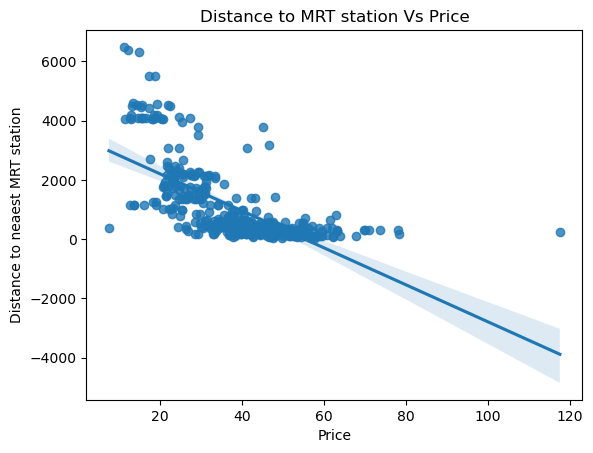

In [20]:
sns.regplot(x = "Y house price of unit area",y = "X3 distance to the nearest MRT station",  data = df)
plt.ylabel("Distance to neaest MRT station")
plt.xlabel("Price")
plt.title("Distance to MRT station Vs Price")
plt.show()

### Plot Number of Convienience Stores Vs Price

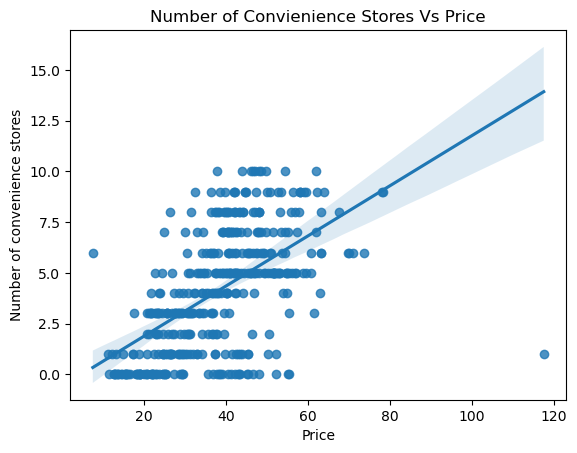

In [25]:
sns.regplot(x = "Y house price of unit area",y = "X4 number of convenience stores",  data = df)
plt.ylabel("Number of convenience stores")
plt.xlabel("Price")
plt.title("Number of Convienience Stores Vs Price")
plt.show()